In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_csv(r"C:\Users\sanid\OneDrive\Desktop\regression avocado\avocado1.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [25]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [26]:
df.isnull().sum() # NO NULL VALUES OR DUPLICATES 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: title={'center': 'Average Avocado Price Over Time'}, xlabel='Date'>

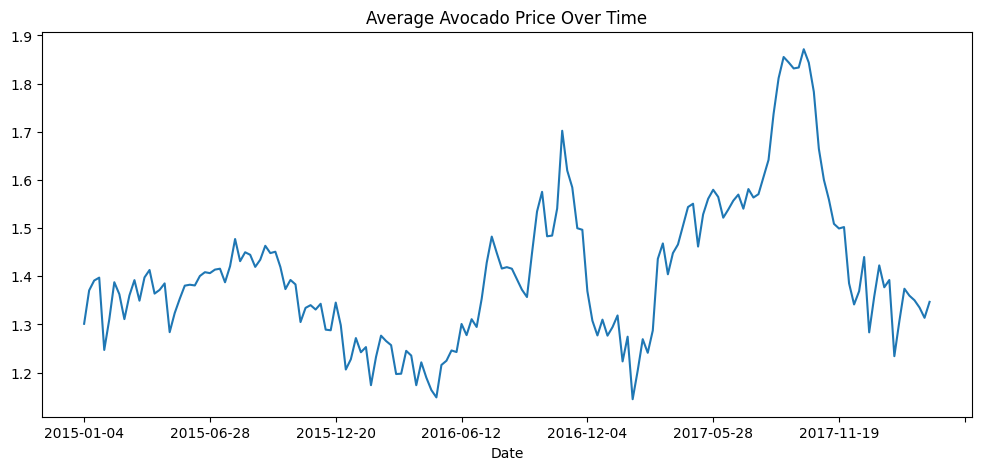

In [27]:
import matplotlib.pyplot as plt
df.groupby('Date')['AveragePrice'].mean().plot(figsize=(12, 5), title="Average Avocado Price Over Time")


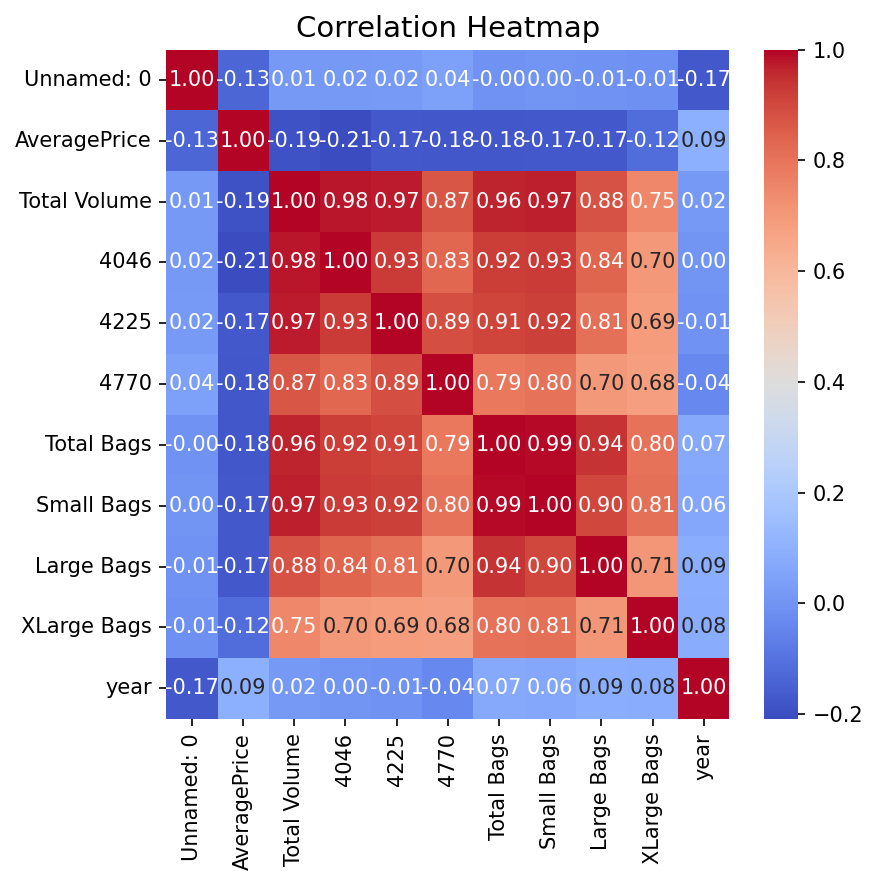

In [28]:
plt.figure(figsize=(6, 6), dpi=150)  # Increase size and resolution
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


In [29]:
df['Date'] = pd.to_datetime(df['Date'])


In [30]:
print(df['Unnamed: 0'])

0         0
1         1
2         2
3         3
4         4
         ..
18244     7
18245     8
18246     9
18247    10
18248    11
Name: Unnamed: 0, Length: 18249, dtype: int64


In [31]:
df.sort_values('Date', inplace=True)


In [32]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [33]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [34]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofweek'] = df['Date'].dt.dayofweek

In [35]:
# Step 2: Drop columns as per your plan
columns_to_drop = [
    '4046','Unnamed: 0', '4225', '4770',             # specific product codes
    'Small Bags', 'Large Bags', 'XLarge Bags',  # bag sizes                           # too many categories
    'Date'                              # not used directly
]
df.drop(columns=columns_to_drop, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   Total Bags    18249 non-null  float64
 3   type          18249 non-null  object 
 4   year          18249 non-null  int32  
 5   region        18249 non-null  object 
 6   month         18249 non-null  int32  
 7   dayofweek     18249 non-null  int32  
dtypes: float64(3), int32(3), object(2)
memory usage: 1.0+ MB


In [37]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

 one hot encoding 

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# One-hot encode 'region' and 'type' using ColumnTransformer
categorical_features = ['region', 'type']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first', sparse_output=False), categorical_features)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)


In [39]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm requires dependant var to be 1d so we flatten it using .ravel()

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, Y_train.ravel())

y_pred = regressor.predict(X_test)



C:\Users\sanid\AppData\Local\Temp\ipykernel_13628\1105450533.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  regressor.fit(X_train, Y_train.ravel())
